In [1]:
import numpy as np
import math
import os.path
from os import path
from icecube.tableio import I3TableWriter
from icecube.hdfwriter import I3HDFTableService, I3HDFWriter
import tables
import pylab
%matplotlib inline
import matplotlib.pyplot as plt
e_bins=np.logspace(1,5,40+1)
e_bin_centers = (e_bins[:-1] + e_bins[1:])/2.0
samplefilename="/home/vbasu/scratch/muon_gun_test_hdf/MuonGunVeto_v4_1.hdf5"
hdf_sample = tables.open_file(samplefilename,'r')
print(hdf_sample)

/home/vbasu/scratch/muon_gun_test_hdf/MuonGunVeto_v4_1.hdf5 (File) ''
Last modif.: 'Sat Aug  1 16:43:14 2020'
Object Tree: 
/ (RootGroup) ''
/CW_Mu_Vertex_0_x (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_0_y (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_0_z (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_1_x (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_1_y (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_1_z (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_2_x (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_2_y (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_2_z (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_3_x (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_3_y (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_3_z (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_4_x (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_4_y (Table(100000,), shuffle, zlib(6)) ''
/CW_Mu_Vertex_4_z (Table(100000,), shuffle, zlib(6)) ''
/EntryMuon_x (Table

In [2]:
EntryEnergy=np.asarray([])
#     PrimaryZenith=np.asarray([])
EntryZenith=np.asarray([])
PrimaryAzimuth=np.asarray([])
EntryAzimuth=np.asarray([])
EntryDepth=np.asarray([])
MuonPresence=np.asarray([])

MCPEDOM_firsthits=np.asarray([])
MCPEDOM_firsthits_time=np.asarray([])
MCPEDOM_firsthits_veto_time=np.asarray([])

VHEVetoMCPEDOM0_0=np.asarray([])
VHEVetoMCPEDOM0_1=np.asarray([])
VHEVetoMCPEDOM0_2=np.asarray([])
VHEVetoMCPEDOM0_3=np.asarray([])
VHEVetoMCPEDOM0_4=np.asarray([])

VHEVetoMCPEDOM0_entry_0=np.asarray([])
VHEVetoMCPEDOM0_entry_1=np.asarray([])
VHEVetoMCPEDOM0_entry_2=np.asarray([])
VHEVetoMCPEDOM0_entry_3=np.asarray([])
VHEVetoMCPEDOM0_entry_4=np.asarray([])

VHEVetoMCPEDOM0_exit_0=np.asarray([])
VHEVetoMCPEDOM0_exit_1=np.asarray([])
VHEVetoMCPEDOM0_exit_2=np.asarray([])
VHEVetoMCPEDOM0_exit_3=np.asarray([])
VHEVetoMCPEDOM0_exit_4=np.asarray([])

Track_Length_Mu=np.asarray([])

Entry_Mu_X=np.asarray([])
Entry_Mu_Y=np.asarray([])
Entry_Mu_Z=np.asarray([])

Exit_Mu_X=np.asarray([])
Exit_Mu_Y=np.asarray([])
Exit_Mu_Z=np.asarray([])

Mu_Vertex_0_X=np.asarray([])
Mu_Vertex_0_Y=np.asarray([])
Mu_Vertex_0_Z=np.asarray([])

Mu_Vertex_1_X=np.asarray([])
Mu_Vertex_1_Y=np.asarray([])
Mu_Vertex_1_Z=np.asarray([])

Mu_Vertex_2_X=np.asarray([])
Mu_Vertex_2_Y=np.asarray([])
Mu_Vertex_2_Z=np.asarray([])

Mu_Vertex_3_X=np.asarray([])
Mu_Vertex_3_Y=np.asarray([])
Mu_Vertex_3_Z=np.asarray([])

Mu_Vertex_4_X=np.asarray([])
Mu_Vertex_4_Y=np.asarray([])
Mu_Vertex_4_Z=np.asarray([])

Qtot=np.asarray([])
nfiles=0
fixed_vert_outdir='/data/user/vbasu/CONDOR_output/MuonGun_Spice_3.2.1_Filter_hdf/'
for i in range(20):
    filename=fixed_vert_outdir + 'MuonGunVeto_v4_'+str(i)+'.hdf5'
    try:
        if path.exists(filename):
            hdf = tables.open_file(filename,'r')
    #                 print(str(len(PrimaryEnergy))+' at i=' +str(i))
    #                     PrimaryEnergy=np.append(PrimaryEnergy,np.asarray(hdf.root.Primary_Energies.cols.value[:]))
            EntryEnergy=np.append(EntryEnergy,np.asarray(hdf.root.Primary_Energies.cols.value[:]))
    #                     PrimaryZenith=np.append(PrimaryZenith,np.asarray(hdf.root.Primary_Zenith.cols.value[:]))
            EntryZenith=np.append(EntryZenith,np.asarray(hdf.root.Primary_Zenith.cols.value[:]))
    #                 PrimaryAzimuth=np.append(PrimaryAzimuth,np.asarray(hdf.root.Primary_Azimuth.cols.value[:]))
    #                 EntryAzimuth=np.append(EntryAzimuth,np.asarray(hdf.root.Entry_Azimuth.cols.value[:]))
            EntryDepth=np.append(EntryDepth,np.asarray(hdf.root.Entry_Muon_Depth.cols.value[:]))
            MuonPresence=np.append(MuonPresence,np.asarray(hdf.root.Primary_HasMuon.cols.value[:]))
            
#             MCPEDOM_firsthits=np.append(MCPEDOM_firsthits,np.asarray(hdf.root.MESE_VHESelfVeto_MCPE_DOM_firsthits.cols.value[:]))
            MCPEDOM_firsthits_time=np.append(MCPEDOM_firsthits_time,np.asarray(hdf.root.VHESelfVeto_MCPE_DOM_firsthits_time.cols.value[:]))
            MCPEDOM_firsthits_veto_time=np.append(MCPEDOM_firsthits_veto_time,np.asarray(hdf.root.VHESelfVeto_MCPE_DOM_firsthits_veto_time.cols.value[:]))
            
            VHEVetoMCPEDOM0_0=np.append(VHEVetoMCPEDOM0_0,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM0_0.cols.value[:]))
            VHEVetoMCPEDOM0_1=np.append(VHEVetoMCPEDOM0_1,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM0_1.cols.value[:]))
            VHEVetoMCPEDOM0_2=np.append(VHEVetoMCPEDOM0_2,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM0_2.cols.value[:]))
            VHEVetoMCPEDOM0_3=np.append(VHEVetoMCPEDOM0_3,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM0_3.cols.value[:]))
            VHEVetoMCPEDOM0_4=np.append(VHEVetoMCPEDOM0_4,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM0_4.cols.value[:]))

            VHEVetoMCPEDOM0_entry_0=np.append(VHEVetoMCPEDOM0_entry_0,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_entry0_0.cols.value[:]))
            VHEVetoMCPEDOM0_entry_1=np.append(VHEVetoMCPEDOM0_entry_1,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_entry0_1.cols.value[:]))
            VHEVetoMCPEDOM0_entry_2=np.append(VHEVetoMCPEDOM0_entry_2,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_entry0_2.cols.value[:]))
            VHEVetoMCPEDOM0_entry_3=np.append(VHEVetoMCPEDOM0_entry_3,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_entry0_3.cols.value[:]))
            VHEVetoMCPEDOM0_entry_4=np.append(VHEVetoMCPEDOM0_entry_4,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_entry0_4.cols.value[:]))

            VHEVetoMCPEDOM0_exit_0=np.append(VHEVetoMCPEDOM0_exit_0,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_exit0_0.cols.value[:]))
            VHEVetoMCPEDOM0_exit_1=np.append(VHEVetoMCPEDOM0_exit_1,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_exit0_1.cols.value[:]))
            VHEVetoMCPEDOM0_exit_2=np.append(VHEVetoMCPEDOM0_exit_2,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_exit0_2.cols.value[:]))
            VHEVetoMCPEDOM0_exit_3=np.append(VHEVetoMCPEDOM0_exit_3,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_exit0_3.cols.value[:]))
            VHEVetoMCPEDOM0_exit_4=np.append(VHEVetoMCPEDOM0_exit_4,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_exit0_4.cols.value[:]))

#             Qtot=np.append(Qtot,np.asarray(hdf.root.Muon_Qtot.cols.value[:]))
            Track_Length_Mu=np.append(Track_Length_Mu,np.asarray(hdf.root.Primary_VHEVeto_MCPE_DOM_total_dist.cols.value[:]))
            Entry_Mu_X=np.append(Entry_Mu_X,np.asarray(hdf.root.EntryMuon_x.cols.value[:]))
            Entry_Mu_Y=np.append(Entry_Mu_Y,np.asarray(hdf.root.EntryMuon_y.cols.value[:]))
            Entry_Mu_Z=np.append(Entry_Mu_Z,np.asarray(hdf.root.EntryMuon_z.cols.value[:]))
            Exit_Mu_X=np.append(Exit_Mu_X,np.asarray(hdf.root.ExitMuon_x.cols.value[:]))
            Exit_Mu_Y=np.append(Exit_Mu_Y,np.asarray(hdf.root.ExitMuon_y.cols.value[:]))
            Exit_Mu_Z=np.append(Exit_Mu_Z,np.asarray(hdf.root.ExitMuon_z.cols.value[:]))

            Mu_Vertex_0_X=np.append(Mu_Vertex_0_X,np.asarray(hdf.root.CW_Mu_Vertex_0_x.cols.value[:]))
            Mu_Vertex_0_Y=np.append(Mu_Vertex_0_Y,np.asarray(hdf.root.CW_Mu_Vertex_0_y.cols.value[:]))
            Mu_Vertex_0_Z=np.append(Mu_Vertex_0_Z,np.asarray(hdf.root.CW_Mu_Vertex_0_z.cols.value[:]))

            Mu_Vertex_1_X=np.append(Mu_Vertex_1_X,np.asarray(hdf.root.CW_Mu_Vertex_1_x.cols.value[:]))
            Mu_Vertex_1_Y=np.append(Mu_Vertex_1_Y,np.asarray(hdf.root.CW_Mu_Vertex_1_y.cols.value[:]))
            Mu_Vertex_1_Z=np.append(Mu_Vertex_1_Z,np.asarray(hdf.root.CW_Mu_Vertex_1_z.cols.value[:]))

            Mu_Vertex_2_X=np.append(Mu_Vertex_2_X,np.asarray(hdf.root.CW_Mu_Vertex_2_x.cols.value[:]))
            Mu_Vertex_2_Y=np.append(Mu_Vertex_2_Y,np.asarray(hdf.root.CW_Mu_Vertex_2_y.cols.value[:]))
            Mu_Vertex_2_Z=np.append(Mu_Vertex_2_Z,np.asarray(hdf.root.CW_Mu_Vertex_2_z.cols.value[:]))

            Mu_Vertex_3_X=np.append(Mu_Vertex_3_X,np.asarray(hdf.root.CW_Mu_Vertex_3_x.cols.value[:]))
            Mu_Vertex_3_Y=np.append(Mu_Vertex_3_Y,np.asarray(hdf.root.CW_Mu_Vertex_3_y.cols.value[:]))
            Mu_Vertex_3_Z=np.append(Mu_Vertex_3_Z,np.asarray(hdf.root.CW_Mu_Vertex_3_z.cols.value[:]))

            Mu_Vertex_4_X=np.append(Mu_Vertex_4_X,np.asarray(hdf.root.CW_Mu_Vertex_4_x.cols.value[:]))
            Mu_Vertex_4_Y=np.append(Mu_Vertex_4_Y,np.asarray(hdf.root.CW_Mu_Vertex_4_y.cols.value[:]))
            Mu_Vertex_4_Z=np.append(Mu_Vertex_4_Z,np.asarray(hdf.root.CW_Mu_Vertex_4_z.cols.value[:]))
            nfiles=nfiles+1
    #               
        else:
            print(filename+' does not exist?')
    except Exception as e:
            print(filename+" Is Faulty")
            print(e)
            continue
    
MuonPresence_mask=[m == 1. for m in MuonPresence]

# MCPEDOM_firsthits=MCPEDOM_firsthits[MuonPresence_mask]
MCPEDOM_firsthits_time=MCPEDOM_firsthits_time[MuonPresence_mask]
MCPEDOM_firsthits_veto_time=MCPEDOM_firsthits_veto_time[MuonPresence_mask]
Entry_Mu_X=Entry_Mu_X[MuonPresence_mask]
Entry_Mu_Y=Entry_Mu_Y[MuonPresence_mask]
Entry_Mu_Z=Entry_Mu_Z[MuonPresence_mask]

Exit_Mu_X=Exit_Mu_X[MuonPresence_mask]
Exit_Mu_Y=Exit_Mu_Y[MuonPresence_mask]
Exit_Mu_Z=Exit_Mu_Z[MuonPresence_mask]

Mu_Vertex_0_X=Mu_Vertex_0_X[MuonPresence_mask]
Mu_Vertex_0_Y=Mu_Vertex_0_Y[MuonPresence_mask]
Mu_Vertex_0_Z=Mu_Vertex_0_Z[MuonPresence_mask]

Mu_Vertex_1_X=Mu_Vertex_1_X[MuonPresence_mask]
Mu_Vertex_1_Y=Mu_Vertex_1_Y[MuonPresence_mask]
Mu_Vertex_1_Z=Mu_Vertex_1_Z[MuonPresence_mask]

Mu_Vertex_2_X=Mu_Vertex_2_X[MuonPresence_mask]
Mu_Vertex_2_Y=Mu_Vertex_2_Y[MuonPresence_mask]
Mu_Vertex_2_Z=Mu_Vertex_2_Z[MuonPresence_mask]

Mu_Vertex_3_X=Mu_Vertex_3_X[MuonPresence_mask]
Mu_Vertex_3_Y=Mu_Vertex_3_Y[MuonPresence_mask]
Mu_Vertex_3_Z=Mu_Vertex_3_Z[MuonPresence_mask]

Mu_Vertex_4_X=Mu_Vertex_4_X[MuonPresence_mask]
Mu_Vertex_4_Y=Mu_Vertex_4_Y[MuonPresence_mask]
Mu_Vertex_4_Z=Mu_Vertex_4_Z[MuonPresence_mask]

Entry_points = np.concatenate((Entry_Mu_X[:, np.newaxis], 
                       Entry_Mu_Y[:, np.newaxis], 
                       Entry_Mu_Z[:, np.newaxis]), 
                      axis=1)
Exit_points = np.concatenate((Exit_Mu_X[:, np.newaxis], 
                       Exit_Mu_Y[:, np.newaxis], 
                       Exit_Mu_Z[:, np.newaxis]), 
                      axis=1)
Mu_Vertex_0_points = np.concatenate((Mu_Vertex_0_X[:, np.newaxis], 
                       Mu_Vertex_0_Y[:, np.newaxis], 
                       Mu_Vertex_0_Z[:, np.newaxis]), 
                      axis=1)
Mu_Vertex_1_points = np.concatenate((Mu_Vertex_1_X[:, np.newaxis], 
                       Mu_Vertex_1_Y[:, np.newaxis], 
                       Mu_Vertex_1_Z[:, np.newaxis]), 
                      axis=1)
Mu_Vertex_2_points = np.concatenate((Mu_Vertex_2_X[:, np.newaxis], 
                       Mu_Vertex_2_Y[:, np.newaxis], 
                       Mu_Vertex_2_Z[:, np.newaxis]), 
                      axis=1)
Mu_Vertex_3_points = np.concatenate((Mu_Vertex_3_X[:, np.newaxis], 
                       Mu_Vertex_3_Y[:, np.newaxis], 
                       Mu_Vertex_3_Z[:, np.newaxis]), 
                      axis=1)
Mu_Vertex_4_points = np.concatenate((Mu_Vertex_4_X[:, np.newaxis], 
                       Mu_Vertex_4_Y[:, np.newaxis], 
                       Mu_Vertex_4_Z[:, np.newaxis]), 
                      axis=1)



Track_endpts_X=Entry_Mu_X-Exit_Mu_X
Track_endpts_Y=Entry_Mu_Y-Exit_Mu_Y
Track_endpts_Z=Entry_Mu_Z-Exit_Mu_Z
Trackmags= np.sqrt(Track_endpts_X**2+Track_endpts_Y**2+Track_endpts_Z**2)
print(Trackmags[:10])
print(len(Track_Length_Mu))
print(len(Trackmags))
print(len(MCPEDOM_firsthits_time))

[ 236.33847159 1313.17456192  954.66464491  928.91529391 1062.71947506
  599.27323795 1074.16485303  814.07325112   49.49277071  719.23612068]
2000000
1653871
1653871


In [3]:
import timeit
def collinear(p0, p1, p2):
    v1 = [p1[0] - p0[0], p1[1] - p0[1], p1[2] - p0[2]]
    v2 = [p2[0] - p0[0], p2[1] - p0[1], p2[2] - p0[2]]
    cross=np.cross(v1,v2)
    return np.sqrt(cross.dot(cross)) < 1e-12
# p0=[1,1,1]
# p1=[2,4,2]
# p2=[3,3,5]

# SETUP_CODE = ''' 
# from __main__ import collinear 
# import numpy as np
# p0=[1,1,1]
# p1=[2,2,2]
# p2=[3,3,3]
# '''
# TEST_CODE = ''' 
# collinear(p0,p1,p2)
# '''
# time=timeit.timeit(stmt = TEST_CODE, setup=SETUP_CODE, number=1000)
# print(time)
# print(collinear(p0,p1,p2))
Mu_Vertex_0_X_mask=[x==0. for x in Mu_Vertex_0_X]
Mu_Vertex_0_Y_mask=[y==0. for y in Mu_Vertex_0_Y]
Mu_Vertex_0_Z_mask=[z==0. for z in Mu_Vertex_0_Z]
Mu_Vertex_0_mask=~np.logical_and.reduce((Mu_Vertex_0_X_mask,Mu_Vertex_0_Y_mask,Mu_Vertex_0_Z_mask))

Mu_Vertex_1_X_mask=[x==0. for x in Mu_Vertex_1_X]
Mu_Vertex_1_Y_mask=[y==0. for y in Mu_Vertex_1_Y]
Mu_Vertex_1_Z_mask=[z==0. for z in Mu_Vertex_1_Z]
Mu_Vertex_1_mask=~np.logical_and.reduce((Mu_Vertex_1_X_mask,Mu_Vertex_1_Y_mask,Mu_Vertex_1_Z_mask))

Mu_Vertex_2_X_mask=[x==0. for x in Mu_Vertex_2_X]
Mu_Vertex_2_Y_mask=[y==0. for y in Mu_Vertex_2_Y]
Mu_Vertex_2_Z_mask=[z==0. for z in Mu_Vertex_2_Z]
Mu_Vertex_2_mask=~np.logical_and.reduce((Mu_Vertex_2_X_mask,Mu_Vertex_2_Y_mask,Mu_Vertex_2_Z_mask))

Mu_Vertex_3_X_mask=[x==0. for x in Mu_Vertex_3_X]
Mu_Vertex_3_Y_mask=[y==0. for y in Mu_Vertex_3_Y]
Mu_Vertex_3_Z_mask=[z==0. for z in Mu_Vertex_3_Z]
Mu_Vertex_3_mask=~np.logical_and.reduce((Mu_Vertex_3_X_mask,Mu_Vertex_3_Y_mask,Mu_Vertex_3_Z_mask))

Mu_Vertex_4_X_mask=[x==0. for x in Mu_Vertex_4_X]
Mu_Vertex_4_Y_mask=[y==0. for y in Mu_Vertex_4_Y]
Mu_Vertex_4_Z_mask=[z==0. for z in Mu_Vertex_4_Z]
Mu_Vertex_4_mask=~np.logical_and.reduce((Mu_Vertex_4_X_mask,Mu_Vertex_4_Y_mask,Mu_Vertex_4_Z_mask))

MCPEDOM_firsthits_time_mask=[x!=0. for x in MCPEDOM_firsthits_time]
MCPEDOM_firsthits_veto_time_mask=[y!=0. for y in MCPEDOM_firsthits_veto_time]

print(len(Mu_Vertex_0_X[Mu_Vertex_0_mask]))
print(len(Mu_Vertex_1_X[Mu_Vertex_1_mask]))
print(len(Mu_Vertex_2_X[Mu_Vertex_2_mask]))
print(len(Mu_Vertex_3_X[Mu_Vertex_3_mask]))
print(len(Mu_Vertex_4_X[Mu_Vertex_4_mask]))

690110
911039
998494
1044665
1072893


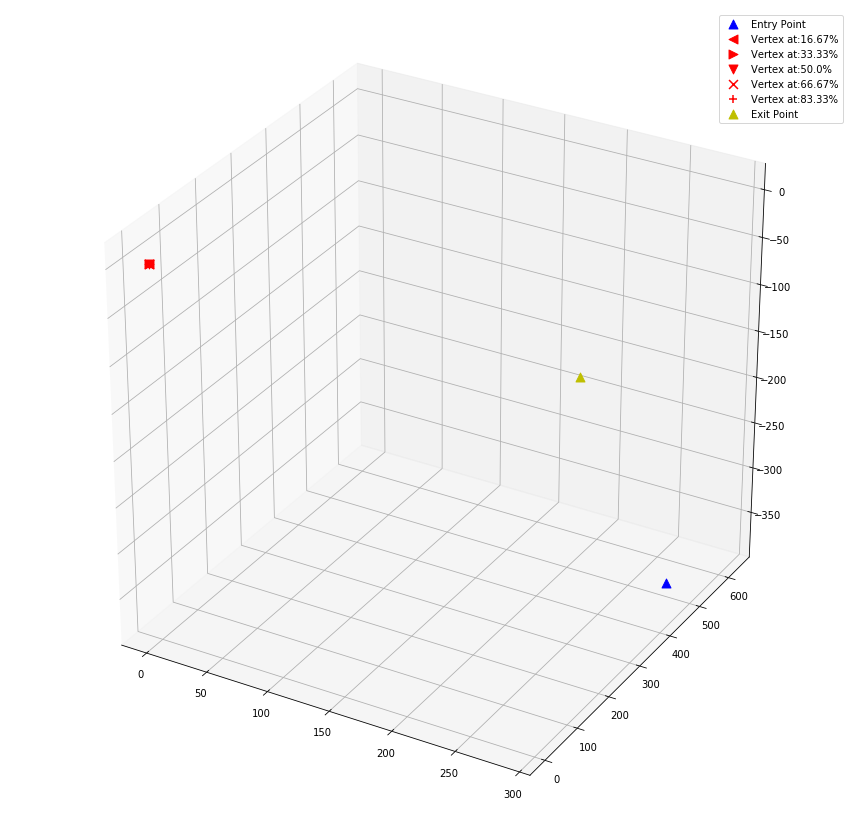

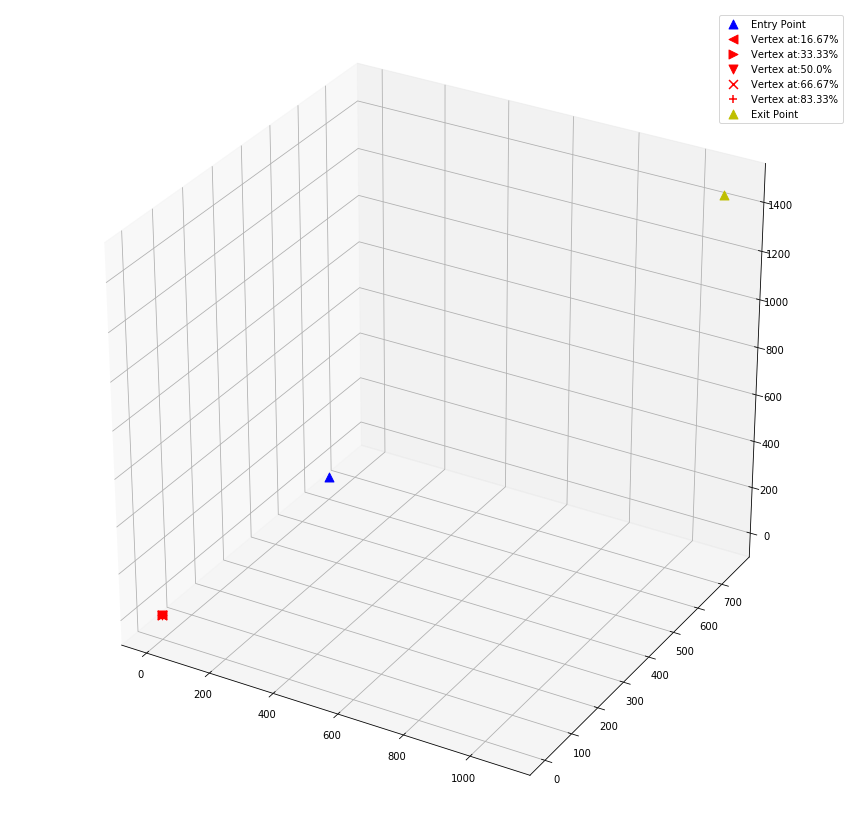

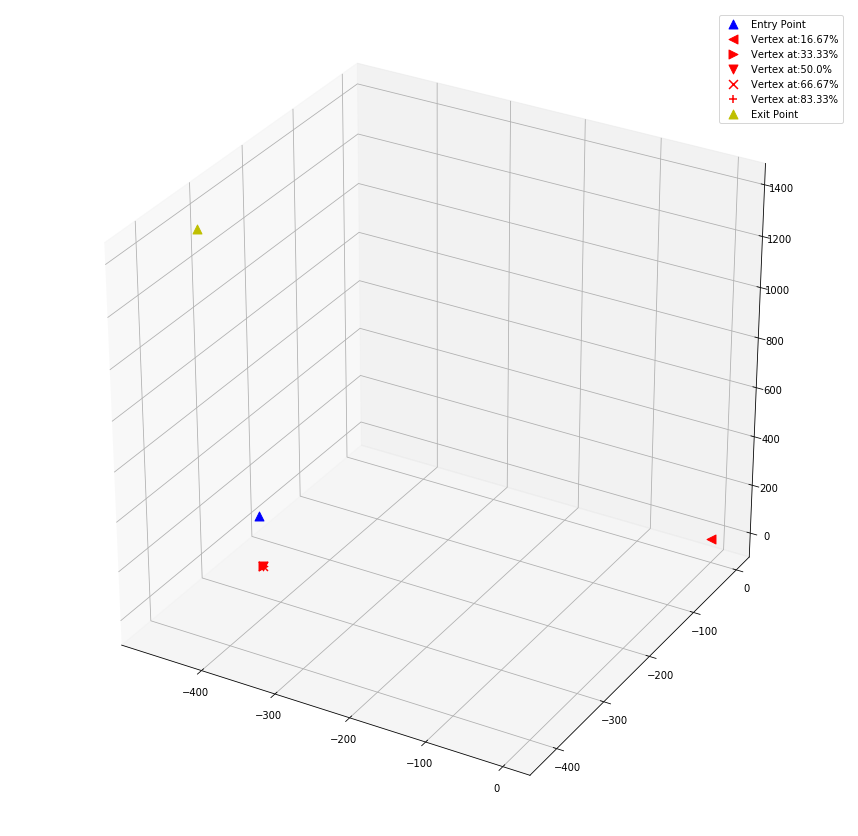

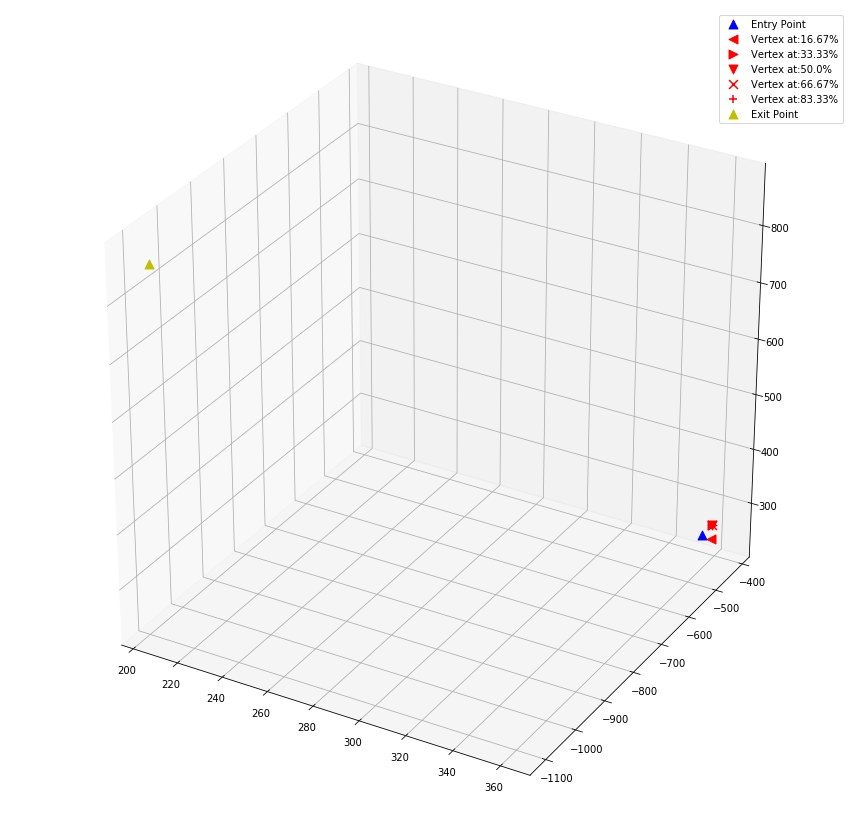

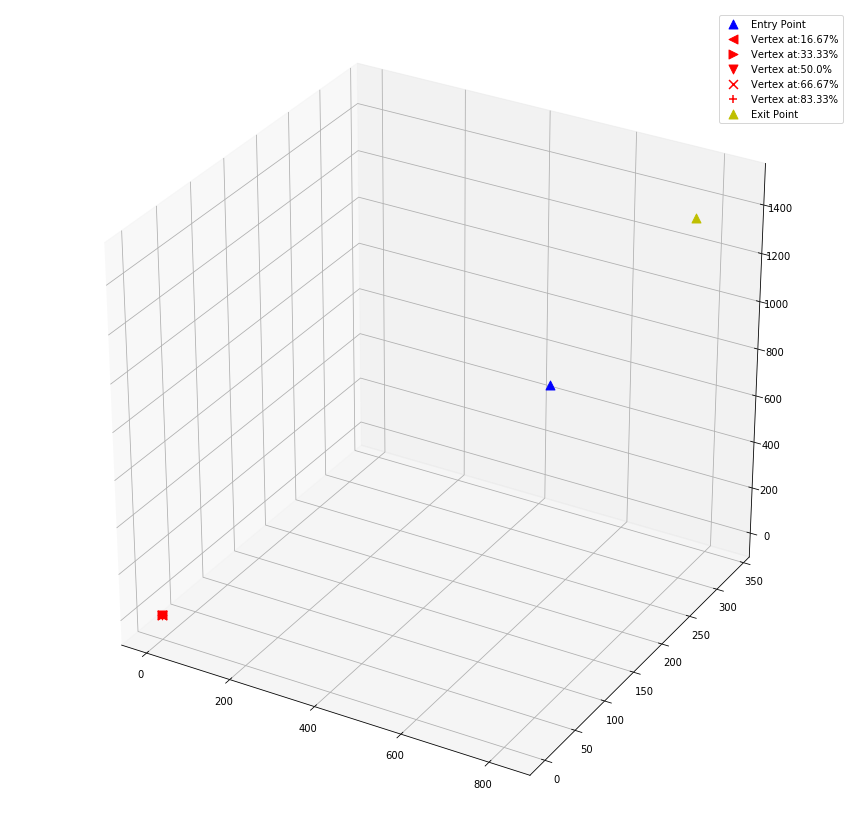

In [4]:
import mpl_toolkits.mplot3d as m3d

vertex_percent_distance=np.around(np.linspace(0.,100.,5+2)[1:-1],decimals=2)
for i in range(5):
    fig = plt.figure(figsize = (15, 15)) 
    ax = plt.axes(projection ="3d") 
    ax.scatter3D([Entry_Mu_X[i]],
                 [Entry_Mu_Y[i]],
                 [Entry_Mu_Z[i]],c='b', marker='^',label='Entry Point',s=80)
    ax.scatter3D([Mu_Vertex_0_X[i]],
                 [Mu_Vertex_0_Y[i]],
                 [Mu_Vertex_0_Z[i]],c='r', marker='<',label='Vertex at:'+str(vertex_percent_distance[0])+'%',s=80)
    ax.scatter3D([Mu_Vertex_1_X[i]],
                 [Mu_Vertex_1_Y[i]],
                 [Mu_Vertex_1_Z[i]],c='r', marker='>',label='Vertex at:'+str(vertex_percent_distance[1])+'%',s=80)
    ax.scatter3D([Mu_Vertex_2_X[i]],
                 [Mu_Vertex_2_Y[i]],
                 [Mu_Vertex_2_Z[i]],c='r', marker='v',label='Vertex at:'+str(vertex_percent_distance[2])+'%',s=80)
    ax.scatter3D([Mu_Vertex_3_X[i]],
                 [Mu_Vertex_3_Y[i]],
                 [Mu_Vertex_3_Z[i]],c='r', marker='x',label='Vertex at:'+str(vertex_percent_distance[3])+'%',s=80)
    ax.scatter3D([Mu_Vertex_4_X[i]],
                 [Mu_Vertex_4_Y[i]],
                 [Mu_Vertex_4_Z[i]],c='r', marker='+',label='Vertex at:'+str(vertex_percent_distance[4])+'%',s=80)
    ax.scatter3D([Exit_Mu_X[i]],
                 [Exit_Mu_Y[i]],
                 [Exit_Mu_Z[i]],c='y', marker='^',label='Exit Point',s=80)
    plt.legend()
    plt.show()

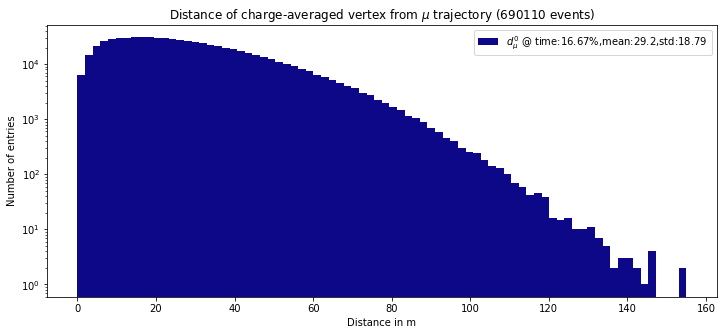

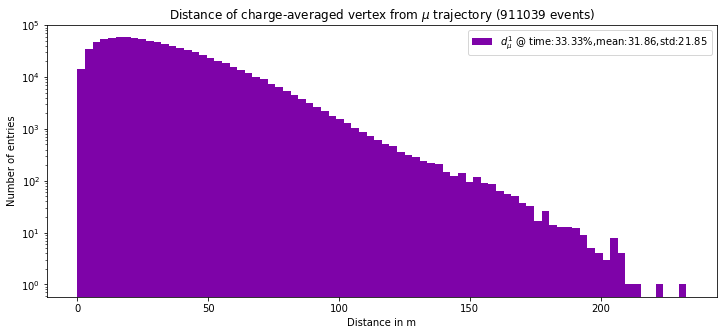

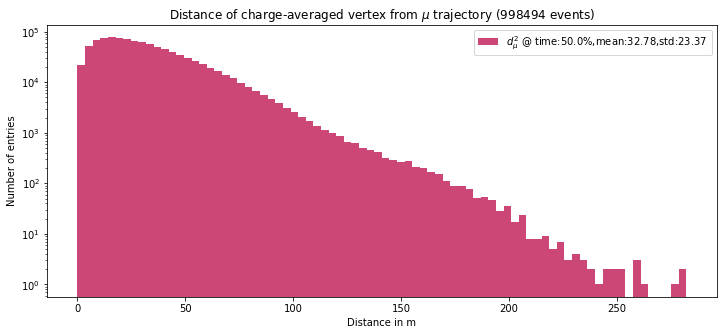

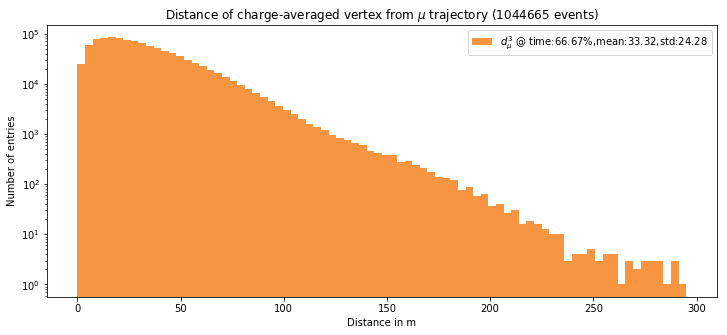

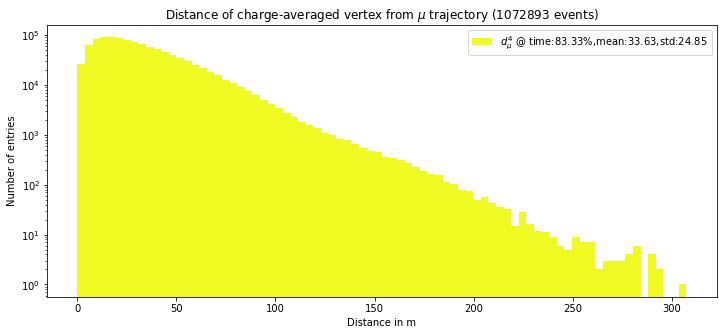

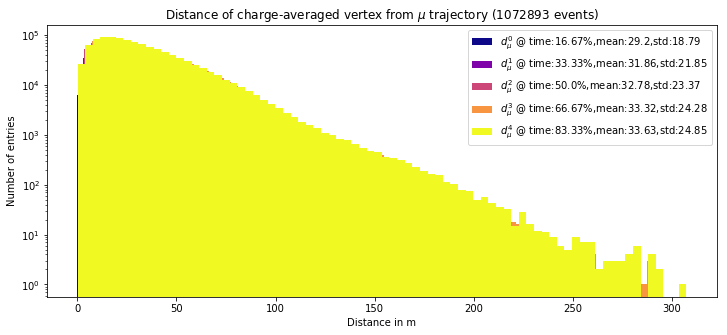

In [5]:
dist_vert_0=np.linalg.norm(np.cross(Mu_Vertex_0_points[Mu_Vertex_0_mask]-Exit_points[Mu_Vertex_0_mask],
                                    Mu_Vertex_0_points[Mu_Vertex_0_mask]-Entry_points[Mu_Vertex_0_mask]),axis=1)/Trackmags[Mu_Vertex_0_mask]
dist_vert_1=np.linalg.norm(np.cross(Mu_Vertex_1_points[Mu_Vertex_1_mask]-Exit_points[Mu_Vertex_1_mask],
                                    Mu_Vertex_1_points[Mu_Vertex_1_mask]-Entry_points[Mu_Vertex_1_mask]),axis=1)/Trackmags[Mu_Vertex_1_mask]
dist_vert_2=np.linalg.norm(np.cross(Mu_Vertex_2_points[Mu_Vertex_2_mask]-Exit_points[Mu_Vertex_2_mask],
                                    Mu_Vertex_2_points[Mu_Vertex_2_mask]-Entry_points[Mu_Vertex_2_mask]),axis=1)/Trackmags[Mu_Vertex_2_mask]
dist_vert_3=np.linalg.norm(np.cross(Mu_Vertex_3_points[Mu_Vertex_3_mask]-Exit_points[Mu_Vertex_3_mask],
                                    Mu_Vertex_3_points[Mu_Vertex_3_mask]-Entry_points[Mu_Vertex_3_mask]),axis=1)/Trackmags[Mu_Vertex_3_mask]
dist_vert_4=np.linalg.norm(np.cross(Mu_Vertex_4_points[Mu_Vertex_4_mask]-Exit_points[Mu_Vertex_4_mask],
                                    Mu_Vertex_4_points[Mu_Vertex_4_mask]-Entry_points[Mu_Vertex_4_mask]),axis=1)/Trackmags[Mu_Vertex_4_mask]

dist_vert=[dist_vert_0,dist_vert_1,dist_vert_2,dist_vert_3,dist_vert_4]
cm = plt.get_cmap('plasma')
colors = [cm(x) for x in np.linspace(0, 1, len(dist_vert))]

for i in range(len(colors)):
    plt.figure(figsize=(12,5))
    hist,bins=np.histogram(dist_vert[i],bins=80)
    mids = 0.5*(bins[1:] + bins[:-1])
    mean = np.around(np.average(mids, weights=hist),decimals=2)
    std = np.around(np.sqrt(np.average((mids - mean)**2, weights=hist)),decimals=2)
    plt.hist(dist_vert[i],bins=80, color=colors[i], label=r'$d_{\mu}^{%i}$ @ time:'%(i)+str(vertex_percent_distance[i])+'%,'
            +'mean:'+str(mean)+',std:'+str(std))
# plt.xscale('log')
    plt.xlabel('Distance in m')
    plt.ylabel(r'Number of entries')
    plt.yscale('log')
    plt.title(r'Distance of charge-averaged vertex from $\mu$ trajectory (' +str(len(dist_vert[i]))+' events)')
    plt.legend()
    plt.show()
    
plt.figure(figsize=(12,5))    
for i in range(len(colors)):
    hist,bins=np.histogram(dist_vert[i],bins=80)
    mids = 0.5*(bins[1:] + bins[:-1])
    mean = np.around(np.average(mids, weights=hist),decimals=2)
    std = np.around(np.sqrt(np.average((mids - mean)**2, weights=hist)),decimals=2)
    plt.hist(dist_vert[i],bins=80, color=colors[i], label=r'$d_{\mu}^{%i}$ @ time:'%(i)+str(vertex_percent_distance[i])+'%,'
            +'mean:'+str(mean)+',std:'+str(std))
# plt.xscale('log')
plt.xlabel('Distance in m')
plt.ylabel(r'Number of entries')
plt.yscale('log')
plt.title(r'Distance of charge-averaged vertex from $\mu$ trajectory (' +str(len(dist_vert[i]))+' events)')
plt.legend()
plt.show()

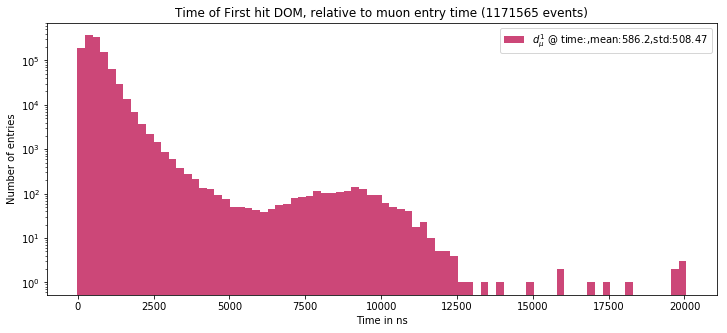

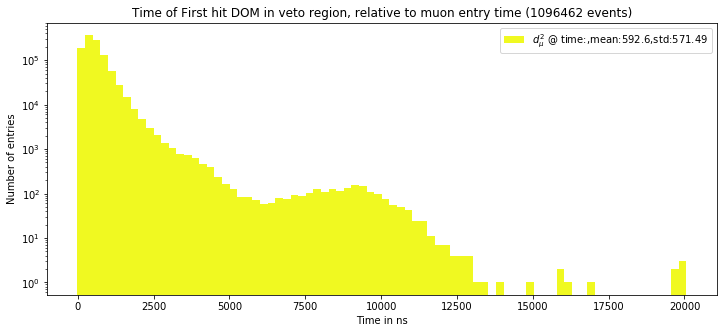

In [6]:
m = plt.get_cmap('plasma')
colors = [cm(x) for x in np.linspace(0, 1, 3)]

# for i in range(len(colors)):
plt.figure(figsize=(12,5))
hist,bins=np.histogram(MCPEDOM_firsthits_time[MCPEDOM_firsthits_time_mask],bins=80)
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.around(np.average(mids, weights=hist),decimals=2)
std = np.around(np.sqrt(np.average((mids - mean)**2, weights=hist)),decimals=2)
plt.hist(MCPEDOM_firsthits_time[MCPEDOM_firsthits_time_mask],bins=80, color=colors[1], label=r'$d_{\mu}^{%i}$ @ time:'%(1) +',mean:'+str(mean)+',std:'+str(std))
# plt.xscale('log')
plt.xlabel('Time in ns')
plt.ylabel(r'Number of entries')
plt.yscale('log')
plt.title(r'Time of First hit DOM, relative to muon entry time (' +str(len(MCPEDOM_firsthits_time[MCPEDOM_firsthits_time_mask]))+' events)')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
hist,bins=np.histogram(MCPEDOM_firsthits_veto_time[MCPEDOM_firsthits_veto_time_mask],bins=80)
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.around(np.average(mids, weights=hist),decimals=2)
std = np.around(np.sqrt(np.average((mids - mean)**2, weights=hist)),decimals=2)
plt.hist(MCPEDOM_firsthits_veto_time[MCPEDOM_firsthits_veto_time_mask],bins=80, color=colors[2], label=r'$d_{\mu}^{%i}$ @ time:'%(2) +',mean:'+str(mean)+',std:'+str(std))
# plt.xscale('log')
plt.xlabel('Time in ns')
plt.ylabel(r'Number of entries')
plt.yscale('log')
plt.title(r'Time of First hit DOM in veto region, relative to muon entry time (' +str(len(MCPEDOM_firsthits_veto_time[MCPEDOM_firsthits_veto_time_mask]))+' events)')
plt.legend()
plt.show()